<a href="https://colab.research.google.com/github/shivangini831-sys/FitPulse-Health-Anomaly-Detection-From-Fitness-Devices/blob/main/Copy_of_milestone2_feature_extraction_and_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install tsfresh prophet scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd

hr = pd.read_csv('/content/drive/MyDrive/heart_rate.csv')
steps = pd.read_csv('/content/drive/MyDrive/steps.csv')
sleep = pd.read_csv('/content/drive/MyDrive/sleep.csv')

print(hr.head())
print(steps.head())
print(sleep.head())


             timestamp  heart_rate
0  2024-01-01 00:00:00        72.5
1  2024-01-01 00:15:00        69.7
2  2024-01-01 00:30:00        74.0
3  2024-01-01 00:45:00        78.8
4  2024-01-01 01:00:00        70.4
             timestamp  steps
0  2024-01-01 00:00:00     22
1  2024-01-01 00:15:00     21
2  2024-01-01 00:30:00     13
3  2024-01-01 00:45:00     16
4  2024-01-01 01:00:00     15
         date  sleep_hours
0  2024-01-01         6.83
1  2024-01-02         6.55
2  2024-01-03         7.70
3  2024-01-04         7.96
4  2024-01-05         7.09


In [ ]:
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

hr_tsfresh = hr.rename(columns={
    'timestamp': 'time',
    'heart_rate': 'value'
})

hr_tsfresh['id'] = 1


In [ ]:
hr_features = extract_features(
    hr_tsfresh,
    column_id='id',
    column_sort='time'
)

impute(hr_features)
hr_features.head()


Feature Extraction: 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]
/usr/local/lib/python3.12/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7
1,1.0,0.0,0.0,1.0,35168.9,2510383.99,5.595792,-0.000601,0.000402,70.65,...,0.079983,0.136002,0.638028,1.790473,3.154372,4.661575,5.808507,6.14641,0.0,89.771429


In [ ]:
hr_selected = hr_features.copy()
print("Features used without variance filtering:", hr_selected.shape)


Features used without variance filtering: (1, 783)


In [ ]:
import pandas as pd

steps = pd.read_csv('/content/drive/MyDrive/steps.csv')

steps['time'] = pd.to_datetime(steps['timestamp'])

# Create daily windows
steps['id'] = steps['time'].dt.date

steps_tsfresh = steps.rename(columns={
    'steps': 'value'
})

steps_tsfresh = steps_tsfresh[['id', 'time', 'value']]
steps_tsfresh.head()


,id,time,value
0,2024-01-01,2024-01-01 00:00:00,22
1,2024-01-01,2024-01-01 00:15:00,21
2,2024-01-01,2024-01-01 00:30:00,13
3,2024-01-01,2024-01-01 00:45:00,16
4,2024-01-01,2024-01-01 01:00:00,15


In [ ]:
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

steps_features = extract_features(
    steps_tsfresh,
    column_id='id',
    column_sort='time'
)

impute(steps_features)

print("Number of samples (days):", steps_features.shape[0])
steps_features.head()


Feature Extraction: 100%|██████████| 6/6 [00:00<00:00,  6.10it/s]
/usr/local/lib/python3.12/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['value__fft_coefficient__attr_"real"__coeff_49'
 'value__fft_coefficient__attr_"real"__coeff_50'
 'value__fft_coefficient__attr_"real"__coeff_51'
 'value__fft_coefficient__attr_"real"__coeff_52'
 'value__fft_coefficient__attr_"real"__coeff_53'
 'value__fft_coefficient__attr_"real"__coeff_54'
 'value__fft_coefficient__attr_"real"__coeff_55'
 'value__fft_coefficient__attr_"real"__coeff_56'
 'value__fft_coefficient__attr_"real"__coeff_57'
 'value__fft_coefficient__attr_"real"__coeff_58'
 'value__fft_coefficient__attr_"real"__coeff_59'
 'value__fft_coefficient__attr_"real"__coeff_60'
 'value__fft_coefficient__attr_"real"__coeff_61'
 'value__fft_coefficient__attr_"real"__coeff_62'
 'value__fft_coefficient__attr_"real"__coeff_63'
 'value__fft_coefficient__attr_"real"__coeff_64'
 'value__fft_coefficient__attr_"real

Number of samples (days): 6


,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7
2024-01-01,1.0,0.0,0.0,1.0,1861.0,37659.0,4.852632,-0.010526,0.026596,19.0,...,1.172851,1.811194,3.261915,1.764767,3.073861,4.009168,4.407956,4.499810,0.0,27.571429
2024-01-02,1.0,0.0,0.0,1.0,1935.0,41071.0,5.473684,0.042105,0.063830,20.0,...,1.142558,1.824924,3.235954,1.771649,3.044844,4.044992,4.449923,4.499810,0.0,28.714286
2024-01-03,1.0,0.0,0.0,1.0,1967.0,42825.0,5.778947,-0.031579,0.074468,20.5,...,1.326412,1.959083,3.424730,1.764772,3.035876,4.092191,4.419455,4.484406,0.0,31.857143
2024-01-04,1.0,0.0,1.0,1.0,1889.0,39229.0,4.621053,-0.073684,0.031915,19.5,...,1.263353,1.923221,3.407117,1.766743,3.104470,4.031918,4.404221,4.484406,0.0,29.857143
2024-01-05,1.0,0.0,1.0,1.0,1886.0,39260.0,5.926316,-0.031579,0.037234,19.5,...,0.761637,1.299553,3.088747,1.756408,3.031426,3.981025,4.449923,4.499810,0.0,29.142857


In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
steps_selected = selector.fit_transform(steps_features)

print("Selected steps features shape:", steps_selected.shape)


Selected steps features shape: (6, 449)


In [ ]:
sleep = pd.read_csv('/content/drive/MyDrive/sleep.csv')

sleep['time'] = pd.to_datetime(sleep['date'])
sleep['id'] = sleep['time']  # each day = one sample

sleep_tsfresh = sleep.rename(columns={
    'sleep_hours': 'value'
})

sleep_tsfresh = sleep_tsfresh[['id', 'time', 'value']]


In [ ]:
sleep_features = extract_features(
    sleep_tsfresh,
    column_id='id',
    column_sort='time'
)

impute(sleep_features)

selector = VarianceThreshold(threshold=0.01)
sleep_selected = selector.fit_transform(sleep_features)

print("Selected sleep features shape:", sleep_selected.shape)


Feature Extraction: 100%|██████████| 60/60 [00:05<00:00, 10.67it/s]
/usr/local/lib/python3.12/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['value__mean_abs_change' 'value__mean_change'
 'value__mean_second_derivative_central' 'value__skewness'
 'value__kurtosis' 'value__sample_entropy' 'value__autocorrelation__lag_0'
 'value__autocorrelation__lag_1' 'value__autocorrelation__lag_2'
 'value__autocorrelation__lag_3' 'value__autocorrelation__lag_4'
 'value__autocorrelation__lag_5' 'value__autocorrelation__lag_6'
 'value__autocorrelation__lag_7' 'value__autocorrelation__lag_8'
 'value__autocorrelation__lag_9' 'value__partial_autocorrelation__lag_0'
 'value__partial_autocorrelation__lag_1'
 'value__partial_autocorrelation__lag_2'
 'value__partial_autocorrelation__lag_3'
 'value__partial_autocorrelation__lag_4'
 'value__partial_autocorrelation__lag_5'
 'value__partial_autocorrelation__lag_6'
 'value__partial_autocorrelation__lag_7'
 'value__partial_

Selected sleep features shape: (60, 22)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


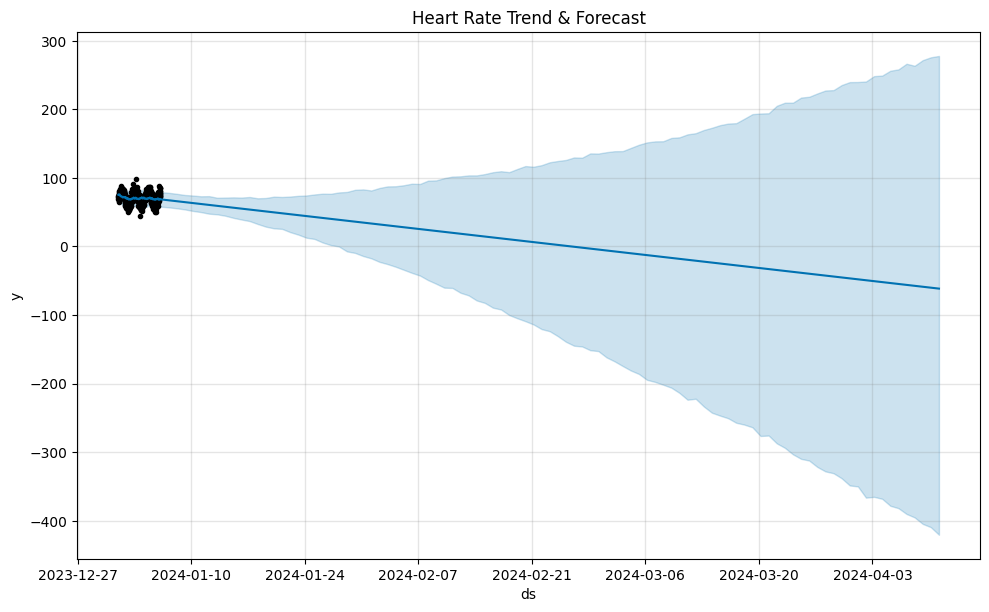

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

df_hr = hr.rename(columns={
    'timestamp': 'ds',
    'heart_rate': 'y'
})

model_hr = Prophet(daily_seasonality=True)
model_hr.fit(df_hr)

future_hr = model_hr.make_future_dataframe(periods=96)  # 1 day forecast
forecast_hr = model_hr.predict(future_hr)

model_hr.plot(forecast_hr)
plt.title("Heart Rate Trend & Forecast")
plt.show()


In [ ]:
df_hr['residual'] = df_hr['y'] - forecast_hr['yhat'][:len(df_hr)]
df_hr.head()


,ds,y,residual
0,2024-01-01 00:00:00,72.5,-2.855340
1,2024-01-01 00:15:00,69.7,-5.515194
2,2024-01-01 00:30:00,74.0,-1.128530
3,2024-01-01 00:45:00,78.8,3.703852
4,2024-01-01 01:00:00,70.4,-4.715409


In [ ]:
steps = pd.read_csv('/content/drive/MyDrive/steps.csv')

df_steps = steps.rename(columns={
    'timestamp': 'ds',
    'steps': 'y'
})


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


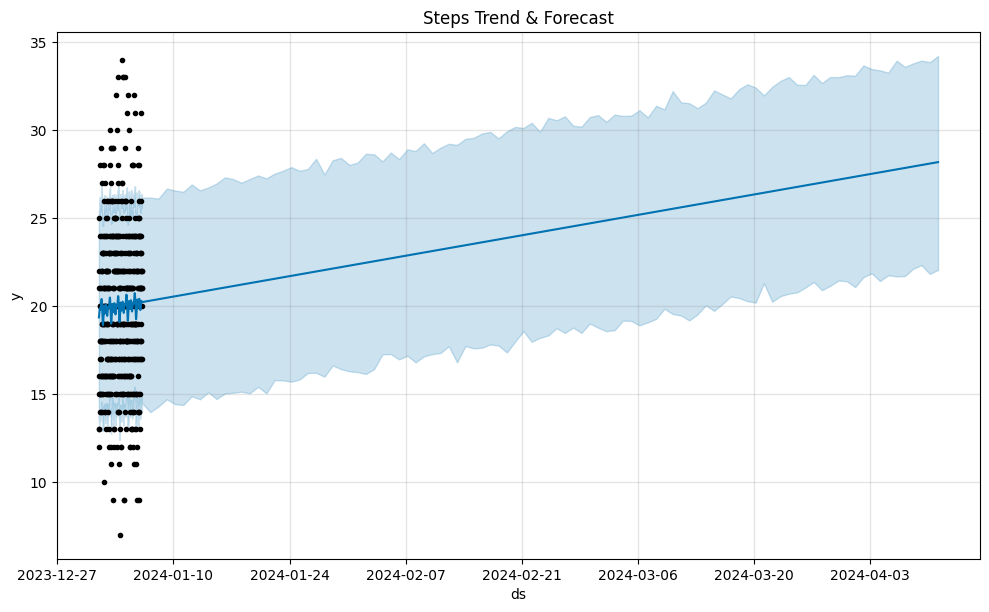

In [ ]:
model_steps = Prophet(daily_seasonality=True)
model_steps.fit(df_steps)

future_steps = model_steps.make_future_dataframe(periods=96)  # 1-day forecast
forecast_steps = model_steps.predict(future_steps)

model_steps.plot(forecast_steps)
plt.title("Steps Trend & Forecast")
plt.show()


In [ ]:
df_steps['residual'] = df_steps['y'] - forecast_steps['yhat'][:len(df_steps)]
df_steps.head()


,ds,y,residual
0,2024-01-01 00:00:00,22,2.642781
1,2024-01-01 00:15:00,21,1.628061
2,2024-01-01 00:30:00,13,-6.403035
3,2024-01-01 00:45:00,16,-3.447959
4,2024-01-01 01:00:00,15,-4.503346


In [ ]:
sleep = pd.read_csv('/content/drive/MyDrive/sleep.csv')

df_sleep = sleep.rename(columns={
    'date': 'ds',
    'sleep_hours': 'y'
})


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


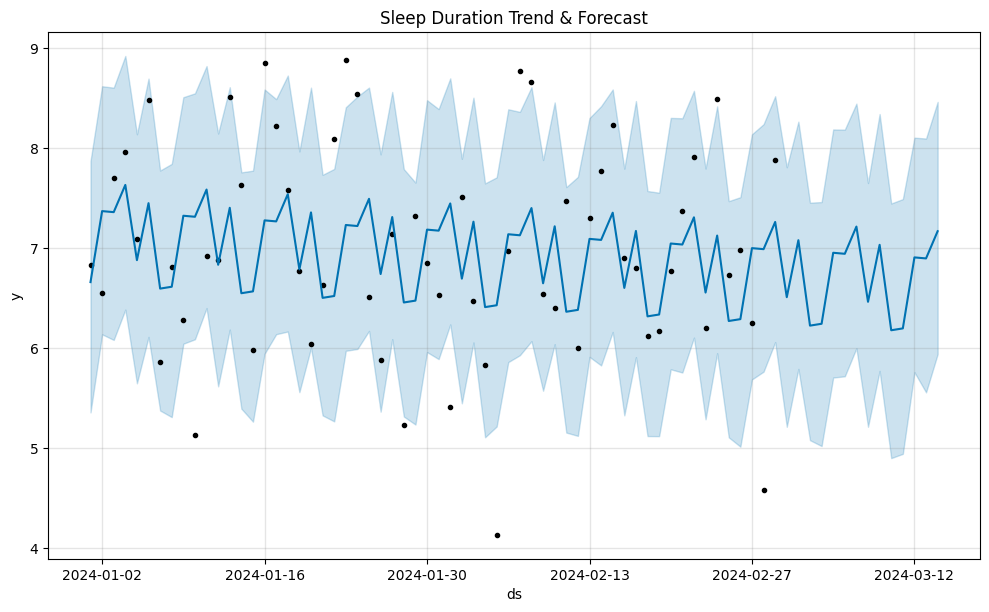

In [ ]:
model_sleep = Prophet(weekly_seasonality=True)
model_sleep.fit(df_sleep)

future_sleep = model_sleep.make_future_dataframe(periods=14)  # 2-week forecast
forecast_sleep = model_sleep.predict(future_sleep)

model_sleep.plot(forecast_sleep)
plt.title("Sleep Duration Trend & Forecast")
plt.show()


In [ ]:
df_sleep['residual'] = df_sleep['y'] - forecast_sleep['yhat'][:len(df_sleep)]
df_sleep.head()


,ds,y,residual
0,2024-01-01,6.83,0.169613
1,2024-01-02,6.55,-0.821411
2,2024-01-03,7.70,0.338837
3,2024-01-04,7.96,0.326362
4,2024-01-05,7.09,0.209806


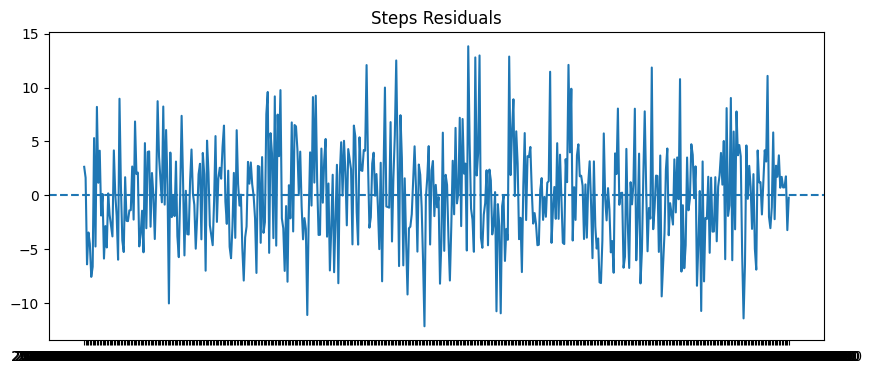

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_steps['ds'], df_steps['residual'])
plt.axhline(0, linestyle='--')
plt.title("Steps Residuals")
plt.show()


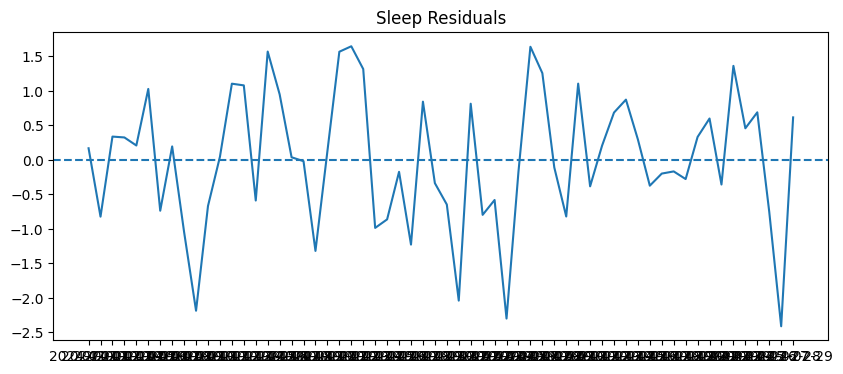

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_sleep['ds'], df_sleep['residual'])
plt.axhline(0, linestyle='--')
plt.title("Sleep Residuals")
plt.show()


In [ ]:
import numpy as np

combined_features = np.hstack([hr_selected])


In [ ]:
print("HR features:", hr_selected.shape)
print("Steps features:", steps_selected.shape)
print("Sleep features:", sleep_selected.shape)


HR features: (1, 783)
Steps features: (6, 449)
Sleep features: (60, 22)


In [ ]:
import pandas as pd

hr_df_feat = pd.DataFrame(hr_selected)
steps_df_feat = pd.DataFrame(steps_selected)
sleep_df_feat = pd.DataFrame(sleep_selected)


In [ ]:
combined_features = pd.concat(
    [hr_df_feat, steps_df_feat, sleep_df_feat],
    axis=1
)

print("Combined shape:", combined_features.shape)


Combined shape: (60, 1254)


In [ ]:
print("NaN count:", np.isnan(combined_features.values).sum())


NaN count: 70443


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
combined_features_imputed = imputer.fit_transform(combined_features)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(combined_features_imputed)

print("Reduced shape:", reduced_features.shape)


Reduced shape: (60, 2)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(reduced_features)


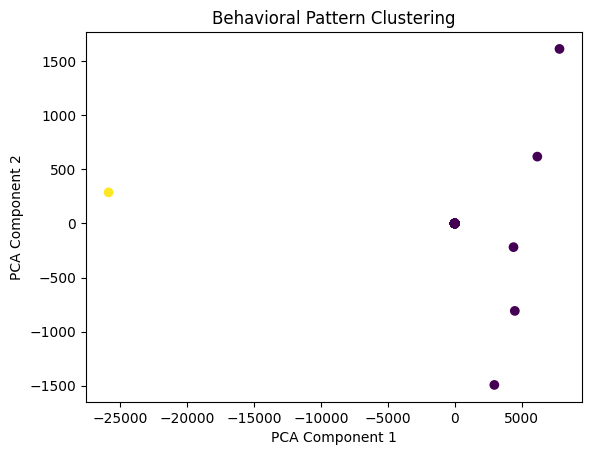

In [ ]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=clusters)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Behavioral Pattern Clustering")
plt.show()


In [ ]:
results = pd.DataFrame({
    'pca_1': reduced_features[:, 0],
    'pca_2': reduced_features[:, 1],
    'cluster': clusters
})

results.head()

,pca_1,pca_2,cluster
0,6172.455680,618.767635,0
1,2962.324861,-1493.709792,0
2,7828.409515,1615.078394,0
3,4394.943938,-218.965751,0
4,4492.200998,-808.925479,0


In [ ]:
results['cluster'].value_counts()


,count
cluster,
0,59
1,1


In [ ]:
results.to_csv("behavioral_clusters.csv", index=False)


In [ ]:
!ls


behavioral_clusters.csv  drive	sample_data
